In [1]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data

Note that data from *All of Us* is being imported into *Final_Birth_Concept_Set_for_Import* and cleaned there,
so the import takes some time (about 2 mins)

In [2]:
# As needed (i.e. once)
!pip install import-ipynb


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


importing Jupyter notebook from Final_Birth_Concept_Set_for_Import.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id         standard_concept_name  condition_start_datetime
0         3169546    Gestation period, 27 weeks 2021-05-21 00:00:00+00:00
1         1120566    Gestation period, 27 weeks 2020-04-06 15:20:47+00:00
2         2628489    Gestation period, 27 weeks 2016-12-10 19:59:30+00:00
3         9093099    Gestation period, 27 weeks 2019-06-22 22:55:00+00:00
4         8017316    Gestation period, 27 weeks 2019-07-18 23:38:06+00:00
...           ...                           ...                       ...
390800    2724654  Gestation less than 24 weeks 2017-07-17 20:09:00+00:00
390801    2716222  Gestation less than 24 weeks 2021-08-15 04:02:00+00:00
390802    1707918  Gestation less than 24 weeks 2019-10-09 16:02:00+00:00
390803    1887809  Gestation less than 24 weeks 2019-06-24 13:24:00+00:00
390804    1647421  Gestation less than 24 weeks 2019-07-23 15:15:00+00:00

[390805 rows x 3 columns]>


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id       standard_concept_name  condition_start_datetime  \
0         3169546  Gestation period, 27 weeks 2021-05-21 00:00:00+00:00   
1         1120566  Gestation period, 27 weeks 2020-04-06 15:20:47+00:00   
2         2628489  Gestation period, 27 weeks 2016-12-10 19:59:30+00:00   
3         9093099  Gestation period, 27 weeks 2019-06-22 22:55:00+00:00   
4         8017316  Gestation period, 27 weeks 2019-07-18 23:38:06+00:00   
...           ...                         ...                       ...   
173722    1121744           Single live birth 2010-03-17 05:00:00+00:00   
173723    2291781           Single live birth 2015-10-22 05:00:00+00:00   
173724    1619651           Single live birth 2017-02-14 05:00:00+00:00   
173725    3025988           Single live birth 2014-04-04 05:00:00+00:00   
173726    1039844           Single live birth 2020-07-29 05:00:00+00:00   

       condition_start_date  
0                2021-05-21  
1      

Final_Birth_Concept_Set_for_Import.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

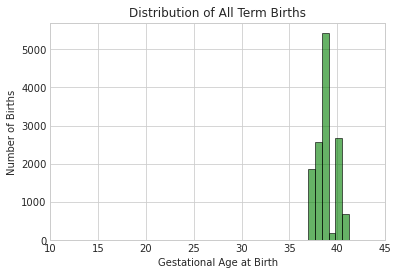

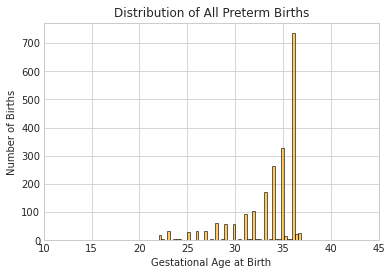

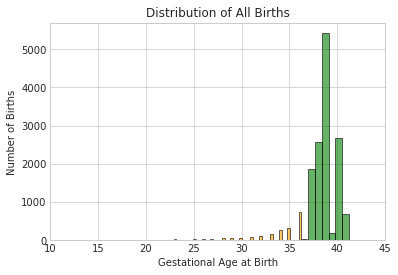

In [3]:
import import_ipynb
from Final_Birth_Concept_Set_for_Import import *

## Importing the BMI Data

In [4]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "measurement" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_measurement_sql = """
    SELECT
        measurement.person_id,
        measurement.measurement_concept_id,
        m_standard_concept.concept_name as standard_concept_name,
        m_standard_concept.concept_code as standard_concept_code,
        m_standard_concept.vocabulary_id as standard_vocabulary,
        measurement.measurement_datetime,
        measurement.measurement_type_concept_id,
        m_type.concept_name as measurement_type_concept_name,
        measurement.operator_concept_id,
        m_operator.concept_name as operator_concept_name,
        measurement.value_as_number,
        measurement.value_as_concept_id,
        m_value.concept_name as value_as_concept_name,
        measurement.unit_concept_id,
        m_unit.concept_name as unit_concept_name,
        measurement.range_low,
        measurement.range_high,
        measurement.visit_occurrence_id,
        m_visit.concept_name as visit_occurrence_concept_name,
        measurement.measurement_source_value,
        measurement.measurement_source_concept_id,
        m_source_concept.concept_name as source_concept_name,
        m_source_concept.concept_code as source_concept_code,
        m_source_concept.vocabulary_id as source_vocabulary,
        measurement.unit_source_value,
        measurement.value_source_value 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_source_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    903124
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 0 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    measurement.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) measurement 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                                ON measurement.measurement_concept_id = m_standard_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_type 
                                ON measurement.measurement_type_concept_id = m_type.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_operator 
                                ON measurement.operator_concept_id = m_operator.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_value 
                                ON measurement.value_as_concept_id = m_value.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_unit 
                                ON measurement.unit_concept_id = m_unit.concept_id 
                        LEFT JOIn
                            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                                ON measurement.visit_occurrence_id = v.visit_occurrence_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_visit 
                                ON v.visit_concept_id = m_visit.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_source_concept 
                                ON measurement.measurement_source_concept_id = m_source_concept.concept_id"""

dataset_38394017_measurement_df = pandas.read_gbq(
    dataset_38394017_measurement_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_38394017_measurement_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

## Importing the Drinking Data

In [5]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                1585636, 1586198, 1586201, 1586207, 1586213
            )
        )  
        AND (
            answer.PERSON_ID IN (
                SELECT
                    distinct person_id  
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                WHERE
                    cb_search_person.person_id IN (
                        SELECT
                            criteria.person_id 
                        FROM
                            (SELECT
                                DISTINCT person_id,
                                entry_date,
                                concept_id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                            WHERE
                                (
                                    concept_id IN (
                                        SELECT
                                            DISTINCT c.concept_id 
                                        FROM
                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                        JOIN
                                            (
                                                select
                                                    cast(cr.id as string) as id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                WHERE
                                                    concept_id IN (36712702, 45757176, 4014295) 
                                                    AND full_text LIKE '%_rank1]%'
                                            ) a 
                                                ON (
                                                    c.path LIKE CONCAT('%.',
                                                a.id,
                                                '.%') 
                                                OR c.path LIKE CONCAT('%.',
                                                a.id) 
                                                OR c.path LIKE CONCAT(a.id,
                                                '.%') 
                                                OR c.path = a.id) 
                                            WHERE
                                                is_standard = 1 
                                                AND is_selectable = 1
                                            ) 
                                            AND is_standard = 1 
                                    )
                                ) criteria 
                            ) 
                            AND cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (903124) 
                                            AND is_standard = 0 
                                        )) criteria ) 
                            )
                        )"""

dataset_38394017_survey_df = pandas.read_gbq(
    dataset_38394017_survey_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_38394017_survey_df.head(5)

Downloading:   0%|          | 0/73363 [00:00<?, ?rows/s]

## Importing the Smoking Data

In [6]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "observation" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_observation_sql = """
    SELECT
        observation.person_id,
        observation.observation_concept_id,
        o_standard_concept.concept_name as standard_concept_name,
        o_standard_concept.concept_code as standard_concept_code,
        o_standard_concept.vocabulary_id as standard_vocabulary,
        observation.observation_datetime,
        observation.observation_type_concept_id,
        o_type.concept_name as observation_type_concept_name,
        observation.value_as_number,
        observation.value_as_string,
        observation.value_as_concept_id,
        o_value.concept_name as value_as_concept_name,
        observation.qualifier_concept_id,
        o_qualifier.concept_name as qualifier_concept_name,
        observation.unit_concept_id,
        o_unit.concept_name as unit_concept_name,
        observation.visit_occurrence_id,
        o_visit.concept_name as visit_occurrence_concept_name,
        observation.observation_source_value,
        observation.observation_source_concept_id,
        o_source_concept.concept_name as source_concept_name,
        o_source_concept.concept_code as source_concept_code,
        o_source_concept.vocabulary_id as source_vocabulary,
        observation.unit_source_value,
        observation.qualifier_source_value,
        observation.value_source_concept_id,
        observation.value_source_value,
        observation.questionnaire_response_id 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
        WHERE
            (
                observation_concept_id IN (
                    4275495, 4276526, 43054909
                ) 
                OR  observation_source_concept_id IN (
                    1585636, 1586198, 1586201, 1586207, 1586213
                )
            )  
            AND (
                observation.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (
                                            SELECT
                                                DISTINCT c.concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                            JOIN
                                                (
                                                    select
                                                        cast(cr.id as string) as id 
                                                    FROM
                                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                    WHERE
                                                        concept_id IN (36712702, 45757176, 4014295) 
                                                        AND full_text LIKE '%_rank1]%'
                                                ) a 
                                                    ON (
                                                        c.path LIKE CONCAT('%.',
                                                    a.id,
                                                    '.%') 
                                                    OR c.path LIKE CONCAT('%.',
                                                    a.id) 
                                                    OR c.path LIKE CONCAT(a.id,
                                                    '.%') 
                                                    OR c.path = a.id) 
                                                WHERE
                                                    is_standard = 1 
                                                    AND is_selectable = 1
                                                ) 
                                                AND is_standard = 1 
                                        )
                                    ) criteria 
                                ) 
                                AND cb_search_person.person_id IN (
                                    SELECT
                                        criteria.person_id 
                                    FROM
                                        (SELECT
                                            DISTINCT person_id,
                                            entry_date,
                                            concept_id 
                                        FROM
                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                        WHERE
                                            (
                                                concept_id IN (903124) 
                                                AND is_standard = 0 
                                            )) criteria ) 
                                )
                            )) observation 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_standard_concept 
                            ON observation.observation_concept_id = o_standard_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_type 
                            ON observation.observation_type_concept_id = o_type.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_value 
                            ON observation.value_as_concept_id = o_value.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_qualifier 
                            ON observation.qualifier_concept_id = o_qualifier.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_unit 
                            ON observation.unit_concept_id = o_unit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                            ON observation.visit_occurrence_id = v.visit_occurrence_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_visit 
                            ON v.visit_concept_id = o_visit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_source_concept 
                            ON observation.observation_source_concept_id = o_source_concept.concept_id"""

dataset_38394017_observation_df = pandas.read_gbq(
    dataset_38394017_observation_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_38394017_observation_df.head(5)

Downloading:   0%|          | 0/263788 [00:00<?, ?rows/s]

# Combining each data frame into a single data frame

## Importing needed packages

In [7]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [8]:
# condition_df

condition_df = final_birth_data



# bmi_df

bmi_df_drop_columns = dataset_38394017_measurement_df.columns.tolist()

bmi_df_drop_columns.remove('person_id')
bmi_df_drop_columns.remove('value_as_number')
# bmi_df_drop_columns.remove('range_low') - upon investigation, not helpful
# bmi_df_drop_columns.remove('range_high') - upon investigation, not helpful
# bmi_df_drop_columns.remove('unit_source_value') - confirmed all observations using same units (kg/m^2)

bmi_df = dataset_38394017_measurement_df.drop(columns=bmi_df_drop_columns).rename(columns={'value_as_number':'BMI'}).copy()



# drinking_df

drinking_df_drop_columns = dataset_38394017_survey_df.columns.tolist()

drinking_df_drop_columns.remove('person_id')
drinking_df_drop_columns.remove('question')
drinking_df_drop_columns.remove('answer')

drinking_df = dataset_38394017_survey_df.drop(columns=drinking_df_drop_columns).copy()



# smoking_df

smoking_df_drop_columns = dataset_38394017_observation_df.columns.tolist()

smoking_df_drop_columns.remove('person_id')
smoking_df_drop_columns.remove('standard_concept_name')
#smoking_df_drop_columns.remove('observation_datetime') - won't be able to use for all data
#smoking_df_drop_columns.remove('observation_type_concept_name') - won't be able to use for all data
smoking_df_drop_columns.remove('value_as_concept_name')
#smoking_df_drop_columns.remove('visit_occurrence_concept_name') - won't be able to use for all data
#smoking_df_drop_columns.remove('source_concept_name') - won't be able to use for all data

smoking_df = dataset_38394017_observation_df.drop(columns=smoking_df_drop_columns).copy()

## Finding common values of *person_id* and restricting data frames to rows with common values

In [9]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_bmi = list(bmi_df.person_id.unique())
unique_ids_drinking = list(drinking_df.person_id.unique())
unique_ids_smoking = list(smoking_df.person_id.unique())

In [10]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids_condition:
    if (pid in unique_ids_bmi) and (pid in unique_ids_drinking) and (pid in unique_ids_smoking):
        common_ids.append(pid)

common_ids.sort()

In [11]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_bmi = bmi_df[bmi_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_drinking = drinking_df[drinking_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_smoking = smoking_df[smoking_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

## Splitting up restricted data frames

We will break up `restricted_condition` by `birth_order`, `restricted_drinking` by `question`, and `restricted_smoking` by `standard_concept_name`

### We start by splitting up *restricted_condition* by *birth_order*

In [12]:
## Note that as of 11 Nov 2023, we see
## Everyone has a first birth
## 3127 out of 11952 have a second birth
## 467 out of 11952 have a third birth
## For run time concerns, we only include first and second births

first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
#third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])
#fourth_birth = restricted_condition[restricted_condition['birth_order'] == 4].copy().sort_values(by=["person_id"])
#fifth_birth = restricted_condition[restricted_condition['birth_order'] == 5].copy().sort_values(by=["person_id"])

### Next, we break up `restricted_drinking` by question

We split up `restricted_drinking` by the four questions asked, which approximately are:
1) Have you ever drank alcohol (aside from a sip or taste)?  
2) How frequently do you drink?  
3) How many drinks do you have daily, on average?  
4) How many times in the past year have you had six or more drinks?  

We then drop the question column and rename the answer column in each case.

Finally, since not all values of `person_id` answer every question, we make a new list of values of `person_id` which do answer every question in `restricted_drinking`. Note that everyone has answered question 1.

Also, since there are only two responses (yes and no) to question 1, we also create a binary version of the responses

In [13]:
drinking_part = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Alcohol Participant'].copy().sort_values(by=['person_id'])

drinking_freq = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Drink Frequency Past Year'].copy().sort_values(by=['person_id'])

drinking_avg = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Average Daily Drink Count'].copy().sort_values(by=['person_id'])

drinking_six = restricted_drinking[restricted_drinking['question'] == 'Alcohol: 6 or More Drinks Occurrence'].copy().sort_values(by=['person_id'])

In [14]:
drinking_part = drinking_part.drop(columns=['question']).copy()
drinking_part = drinking_part.rename(columns={'answer':'ever_drank_alcohol'})
drinking_part.loc[:,'ever_drank_alcohol_binary'] = pd.get_dummies(drinking_part['ever_drank_alcohol'])['Alcohol Participant: Yes'].copy()

drinking_freq = drinking_freq.drop(columns=['question']).copy()
drinking_freq = drinking_freq.rename(columns={'answer':'drinking_frequency'})

drinking_avg = drinking_avg.drop(columns=['question']).copy()
drinking_avg = drinking_avg.rename(columns={'answer':'daily_drink_count'})

drinking_six = drinking_six.drop(columns=['question']).copy()
drinking_six = drinking_six.rename(columns={'answer':'six_or_more_drinks_occurrence'})

In [15]:
drinking_ids = []

freq_ids = drinking_freq.person_id.tolist()
avg_ids = drinking_avg.person_id.tolist()
six_ids = drinking_six.person_id.tolist()

for pid in common_ids:
    if (pid in freq_ids) and (pid in avg_ids) and (pid in six_ids):
        drinking_ids.append(pid)

drinking_ids.sort()

### Next, we handle `restricted_smoking`

The `restricted_drinking` has several values of `standard_concept_name` of interest, namely:
1) Tobacco smoking behavior - finding   
2) Tobacco smoking status  
3) Cigarette smoker  

Note, many values of `person_id` have multiple responses for each. As a result, we build our own feature which records if a value of `person_id` has ever been a smoker.

Also, 3 has many fewer values than 1 and 2 and is partially covered by 2, so we do not use it here

#### We begin by splitting up `restricted_smoking` by `standard_concept_name`

In [16]:
smoking_tob_beh = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Tobacco smoking behavior - finding'].copy().sort_values(by=['person_id'])

smoking_tob_stat = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Tobacco smoking status'].copy().sort_values(by=['person_id'])

smoking_cig = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Cigarette smoker'].copy().sort_values(by=['person_id'])

#### Next, we create lists for values of `value_as_concept_name` which identify smokers and non-smokers for behavior and status

In [17]:
smoker_values_beh = ['Smoker', 'Ex-smoker', 'Smokes tobacco daily', 'Occasional tobacco smoker',
                'Moderate smoker (20 or less per day)', 'Light tobacco smoker']

smoker_values_stat = ['Cigarette smoker', 'Ex-smoker', 'Smokes tobacco daily', 'Occasional tobacco smoker',
                'Current every day smoker', 'Light tobacco smoker']

non_smoker_values = ['Non-smoker', 'Never smoked tobacco']

#### Now, we begin filtering for all values of `person_id` which have ever been identified as a smoker from behavior and status

In [18]:
tob_beh_smokers = list(smoking_tob_beh[smoking_tob_beh['value_as_concept_name'].isin(smoker_values_beh)].person_id.unique())

tob_stat_smokers = list(smoking_tob_stat[smoking_tob_stat['value_as_concept_name'].isin(smoker_values_stat)].person_id.unique())

stat_not_beh_smokers = [pid for pid in tob_stat_smokers if pid not in tob_beh_smokers]

smoker_ids = tob_beh_smokers.copy()
smoker_ids.extend(stat_not_beh_smokers)

smoker_ids.sort()

#### Next, we filter for all values of `person_id` which are identified as non-smokers from behavior and status

In [19]:
tob_beh_non_smokers = list(smoking_tob_beh[smoking_tob_beh['value_as_concept_name'].isin(non_smoker_values)].person_id.unique())

tob_stat_non_smokers = list(smoking_tob_stat[smoking_tob_stat['value_as_concept_name'].isin(non_smoker_values)].person_id.unique())

stat_not_beh_non_smokers = [pid for pid in tob_stat_non_smokers if pid not in tob_beh_non_smokers]

poten_non_smoker_ids = tob_beh_non_smokers.copy()
poten_non_smoker_ids.extend(stat_not_beh_smokers)

poten_non_smoker_ids.sort()

#### We now construct our lists of non-smokers and unknowns

In [20]:
remain_common_ids = [pid for pid in common_ids if pid not in smoker_ids]

non_smoker_ids = [pid for pid in remain_common_ids if pid in poten_non_smoker_ids]

unknown_smoking_status_ids = [pid for pid in remain_common_ids if pid not in poten_non_smoker_ids]

#### Next, we create a data frame for smokers, non-smokers, and unknowns, respectively

In [25]:
simple_smokers = pd.DataFrame({'person_id':smoker_ids})
simple_smokers["smoking_status"] = 'Smoker'

simple_non_smokers = pd.DataFrame({'person_id':non_smoker_ids})
simple_non_smokers["smoking_status"] = 'Non-smoker'

simple_unknown_smokers = pd.DataFrame({'person_id':unknown_smoking_status_ids})
simple_unknown_smokers["smoking_status"] = 'Unknown'

#### Finally, we merge these all into a single data frame

In [26]:
simple_smoking = pd.concat([simple_smokers, simple_non_smokers])
simple_smoking = pd.concat([simple_smoking, simple_unknown_smokers])

simple_smoking = simple_smoking.copy().sort_values(by=['person_id'])

In [27]:
simple_smoking.head(20)

,person_id,smoking_status
0,1000131,Unknown
0,1000195,Non-smoker
1,1000724,Unknown
2,1001000,Unknown
3,1001034,Unknown
0,1001207,Smoker
4,1001211,Unknown
1,1001591,Non-smoker
5,1001878,Unknown
6,1001946,Unknown


## Merging the data frames

### We begin by merging `restricted_bmi` and `simple_smoking`

We start here as we have entries in these data frames for each value of `person_id` in `common_ids`

In [28]:
combined_df_half = pd.merge(restricted_bmi, simple_smoking, on='person_id')

### Restricting one more time

We now restrict all of our small data frames to values of `person_id` in `drinking_ids`

In [29]:
combined_df_half = combined_df_half[combined_df_half["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
first_birth = first_birth[first_birth["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
second_birth = second_birth[second_birth["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])

drinking_part = drinking_part[drinking_part["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_freq = drinking_freq[drinking_freq["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_avg = drinking_avg[drinking_avg["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_six = drinking_six[drinking_six["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])

### Now, we can merge `combined_df_half` with the drinking data frames

In [33]:
combined_df_half = pd.merge(combined_df_half, drinking_part, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_freq, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_avg, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_six, on='person_id')

In [38]:
combined_df_half.head()

,person_id,BMI,smoking_status,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence
0,1000131,36.500000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year
1,1000724,40.599998,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly
2,1001034,28.900000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year
3,1001207,28.000000,Smoker,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Weekly
4,1001211,23.799999,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly


### Next, we create two copies of `combined_df_half`, adding `first births` to one and adding `second_births` to the other

#### The `first_births` case is immediate

In [37]:
combined_df_first_births = pd.merge(combined_df_half, first_birth, on='person_id')

#### The `second_birth` case requires us to restrict to values of `person_id` with a second birth

In [39]:
combined_df_second_births = combined_df_half.copy()

second_birthers = second_birth.person_id.tolist()

combined_df_second_births = combined_df_second_births[combined_df_second_births['person_id'].isin(second_birthers)].copy()
combined_df_second_births = combined_df_second_births.sort_values(by=["person_id"])

combined_df_second_births = pd.merge(combined_df_second_births, second_birth, on='person_id')

In [40]:
combined_df_second_births.head()

,person_id,BMI,smoking_status,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,condition_start_date,birth_class,gestational_age_at_birth,birth_order
0,1001034,28.900000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,2019-06-29,Preterm,29.0,2
1,1001211,23.799999,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2018-11-28,Term,38.0,2
2,1001878,22.700001,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2021-07-26,Term,39.0,2
3,1003625,23.299999,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 10 or More,6 or More Drinks Occurrence: Less Than Monthly,2015-12-12,Preterm,29.0,2
4,1005687,24.200001,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,2021-05-08,Term,39.0,2


### We now concatenate the two data frames into one data frame

In [41]:
combined_df = pd.concat([combined_df_first_births, combined_df_second_births])

combined_df = combined_df.sort_values(by=["person_id", "birth_order"])

combined_df.reset_index(inplace=True)

birth = combined_df.drop(columns=['index'])

In [42]:
birth.head(10)

,person_id,BMI,smoking_status,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,condition_start_date,birth_class,gestational_age_at_birth,birth_order
0,1000131,36.500000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,2021-09-22,Term,39.0,1
1,1000724,40.599998,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2019-08-06,Term,40.0,1
2,1001034,28.900000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,2017-06-28,Term,39.0,1
3,1001034,28.900000,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,2019-06-29,Preterm,29.0,2
4,1001207,28.000000,Smoker,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Weekly,2020-02-15,Term,40.0,1
5,1001211,23.799999,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2016-09-19,Term,40.0,1
6,1001211,23.799999,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2018-11-28,Term,38.0,2
7,1001878,22.700001,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2016-12-26,Term,39.0,1
8,1001878,22.700001,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,2021-07-26,Term,39.0,2
9,1001946,26.200001,Unknown,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 3 or 4,6 or More Drinks Occurrence: Less Than Monthly,2020-05-11,Term,37.0,1
